<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/historical_volatility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance --q

In [2]:
import yfinance as yf

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the Nifty symbol and time period
nifty_symbol = "^NSEI"
end_date = "2023-08-14"  # End date of the 30-day period

# Fetch historical Nifty data from Yahoo Finance for the past one year
start_date = pd.to_datetime(end_date) - pd.DateOffset(years=3)
nifty_data = yf.download(nifty_symbol, start=start_date, end=end_date)

# Calculate daily logarithmic returns
nifty_data["Log_Returns"] = np.log(nifty_data["Close"] / nifty_data["Close"].shift(1))

# Calculate 30-day rolling standard deviation of logarithmic returns
rolling_std = nifty_data["Log_Returns"].rolling(window=10).std()

# Shift the rolling standard deviation values by 30 days to align with correct periods
historical_volatility_past_year = rolling_std.shift(10)

# Multiply by the square root of 252 to annualize the volatility
historical_volatility_past_year *= np.sqrt(252)
historical_volatility_past_year *= 100
# Calculate the historical_volatility_past_year percentile
percentile_values = []
for i, vol in enumerate(historical_volatility_past_year):
    days_below_current_vol = historical_volatility_past_year[historical_volatility_past_year < vol]
    percentile = (len(days_below_current_vol) / len(historical_volatility_past_year)) * 100
    percentile_values.append(percentile)

# Create a DataFrame to store the results
percentile_df = pd.DataFrame({'Date': historical_volatility_past_year.index, 'Percentile': percentile_values})
percentile_df.set_index('Date', inplace=True)



[*********************100%%**********************]  1 of 1 completed


In [4]:
percentile_df_10=percentile_df.dropna()
historical_volatility_past_year_10=historical_volatility_past_year.dropna()
nifty_data_10=nifty_data[20:]
percentile_df_10=percentile_df_10[20:]

In [5]:
len(nifty_data_10),len(historical_volatility_past_year_10) ,len(percentile_df_10)

(724, 724, 724)

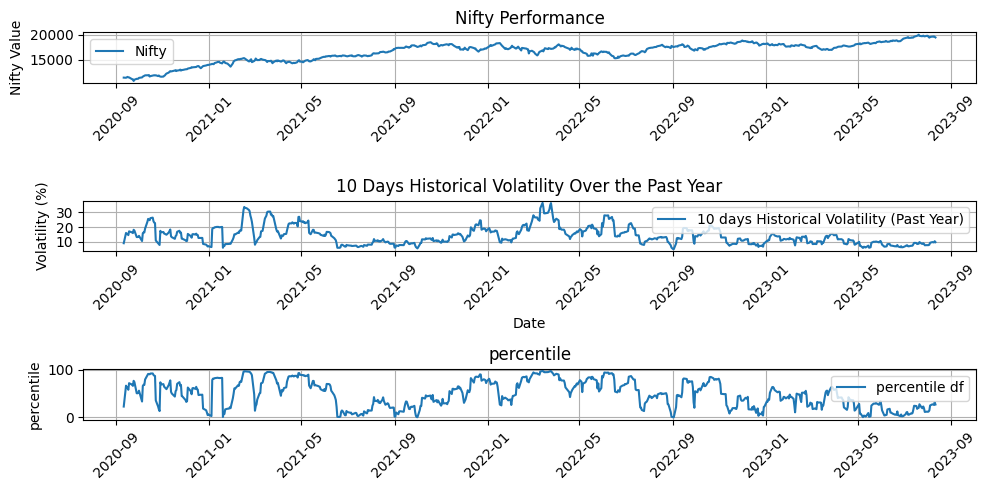

In [6]:
# Create a figure with two sub-plots
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(10, 5))

# Plot for nifty
ax1.plot(nifty_data_10.index, nifty_data_10["Close"], label='Nifty')
ax1.set_ylabel('Nifty Value')
ax1.set_title('Nifty Performance')
ax1.legend()
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)

# Plot for historical volatility
ax2.plot(historical_volatility_past_year_10.index, historical_volatility_past_year_10.values, label='10 days Historical Volatility (Past Year)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volatility (%)')
ax2.set_title('10 Days Historical Volatility Over the Past Year')
ax2.legend()
ax2.grid(True)
ax2.tick_params(axis='x', rotation=45)

# Plot for nifty
ax3.plot(percentile_df_10.index, percentile_df_10.values, label='percentile df')
ax3.set_ylabel('percentile')
ax3.set_title('percentile')
ax3.legend()
ax3.grid(True)
ax3.tick_params(axis='x', rotation=45)

# Adjust layout and spacing between sub-plots
plt.tight_layout()

# Show the plot
plt.show()



In [7]:
# Calculate daily logarithmic returns
nifty_data["Log_Returns"] = np.log(nifty_data["Close"] / nifty_data["Close"].shift(1))

# Calculate 30-day rolling standard deviation of logarithmic returns
rolling_std = nifty_data["Log_Returns"].rolling(window=30).std()

# Shift the rolling standard deviation values by 30 days to align with correct periods
historical_volatility_past_year = rolling_std.shift(30)

# Multiply by the square root of 252 to annualize the volatility
historical_volatility_past_year *= np.sqrt(252)
historical_volatility_past_year *= 100
# Calculate the historical_volatility_past_year percentile
percentile_values = []
for i, vol in enumerate(historical_volatility_past_year):
    days_below_current_vol = historical_volatility_past_year[historical_volatility_past_year < vol]
    percentile = (len(days_below_current_vol) / len(historical_volatility_past_year)) * 100
    percentile_values.append(percentile)

# Create a DataFrame to store the results
percentile_df = pd.DataFrame({'Date': historical_volatility_past_year.index, 'Percentile': percentile_values})
percentile_df.set_index('Date', inplace=True)



In [8]:
percentile_df.dropna(inplace=True)
historical_volatility_past_year.dropna(inplace=True)
nifty_data=nifty_data[60:]
percentile_df=percentile_df[60:]

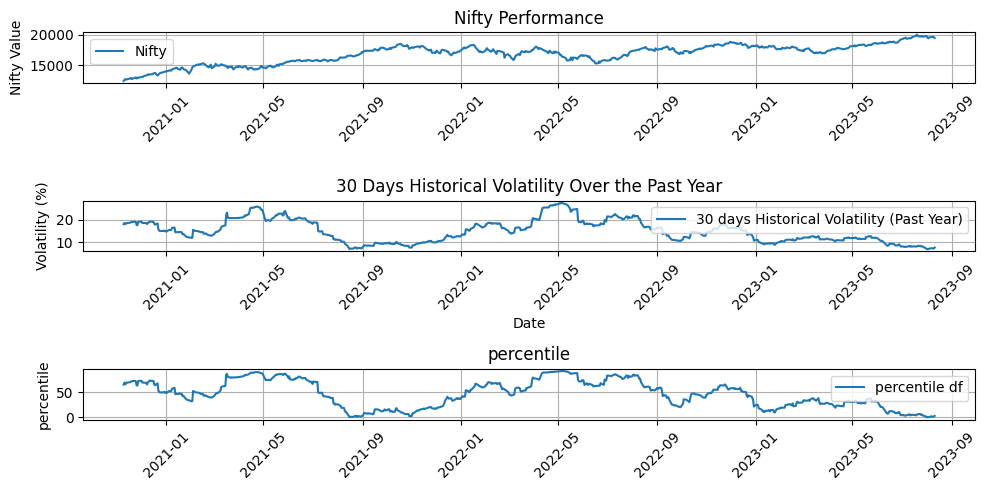

In [9]:
# Create a figure with two sub-plots
fig, (ax1,ax2, ax3) = plt.subplots(3, 1, figsize=(10, 5))

# Plot for nifty
ax1.plot(nifty_data.index, nifty_data["Close"], label='Nifty')
ax1.set_ylabel('Nifty Value')
ax1.set_title('Nifty Performance')
ax1.legend()
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)


# Plot for historical volatility
ax2.plot(historical_volatility_past_year.index, historical_volatility_past_year.values, label='30 days Historical Volatility (Past Year)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volatility (%)')
ax2.set_title('30 Days Historical Volatility Over the Past Year')
ax2.legend()
ax2.grid(True)
ax2.tick_params(axis='x', rotation=45)

# Plot for nifty
ax3.plot(percentile_df.index, (percentile_df.values), label='percentile df')
ax3.set_ylabel('percentile')
ax3.set_title('percentile')
ax3.legend()
ax3.grid(True)
ax3.tick_params(axis='x', rotation=45)

# Adjust layout and spacing between sub-plots
plt.tight_layout()

# Show the plot
plt.show()



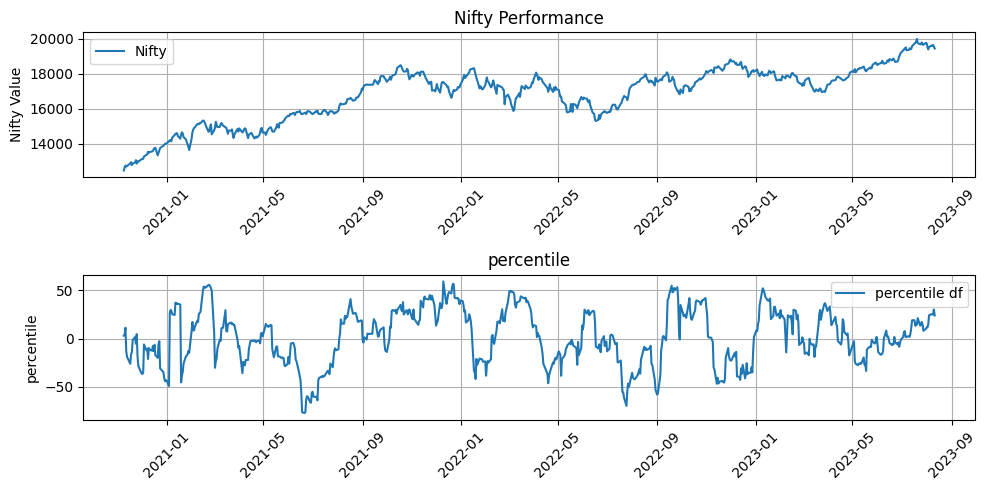

In [10]:
# Create a figure with two sub-plots
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(10, 5))

# Plot for nifty
ax1.plot(nifty_data.index, nifty_data["Close"], label='Nifty')
ax1.set_ylabel('Nifty Value')
ax1.set_title('Nifty Performance')
ax1.legend()
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)

'''
# Plot for historical volatility
ax2.plot(historical_volatility_past_year.index, historical_volatility_past_year.values, label='30 days Historical Volatility (Past Year)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volatility (%)')
ax2.set_title('30 Days Historical Volatility Over the Past Year')
ax2.legend()
ax2.grid(True)
ax2.tick_params(axis='x', rotation=45)
'''
# Plot for nifty
ax3.plot(percentile_df.index, (percentile_df_10.values[40:]-percentile_df.values), label='percentile df')
ax3.set_ylabel('percentile')
ax3.set_title('percentile')
ax3.legend()
ax3.grid(True)
ax3.tick_params(axis='x', rotation=45)

# Adjust layout and spacing between sub-plots
plt.tight_layout()

# Show the plot
plt.show()

